In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [442]:
#load data from 
titanic_data=pd.read_csv(r"E:\titanic\archive\tested.csv")

In [443]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [444]:
len(titanic_data)

418

In [445]:
# information about data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [446]:
#statistics for max and min value 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [447]:
titanic_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [448]:
#check for missing value
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [449]:
titanic_data['Age'].isna().sum()

86

In [450]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

20.574162679425836

In [451]:
#% of null values in cabin column 
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

78.22966507177034

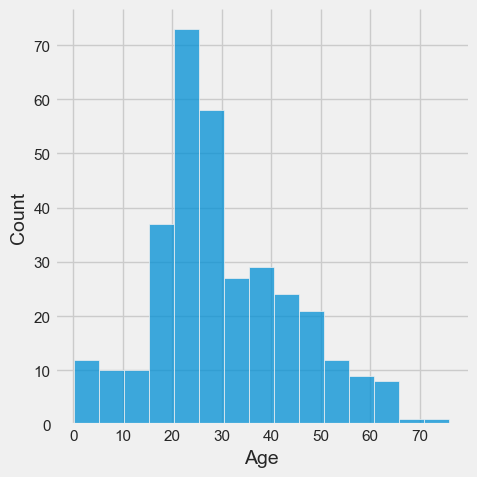

In [452]:
#find the disribution for age column
sns.displot(x='Age',data=titanic_data)

<Axes: >

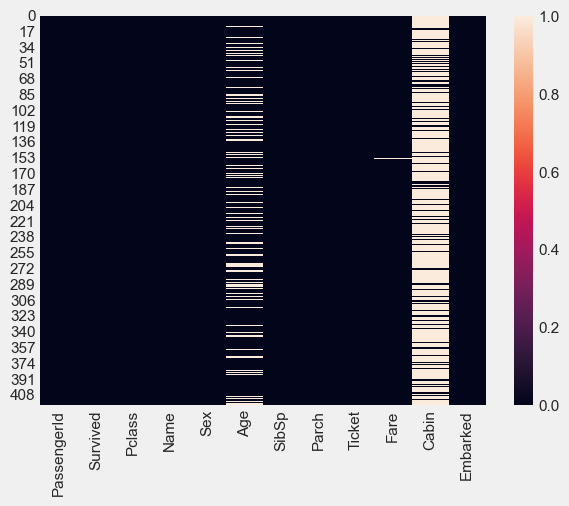

In [453]:
sns.heatmap(titanic_data.isna())

In [454]:
#replce missing value in age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [455]:
titanic_data['Age'].isna().sum()

0

<Axes: >

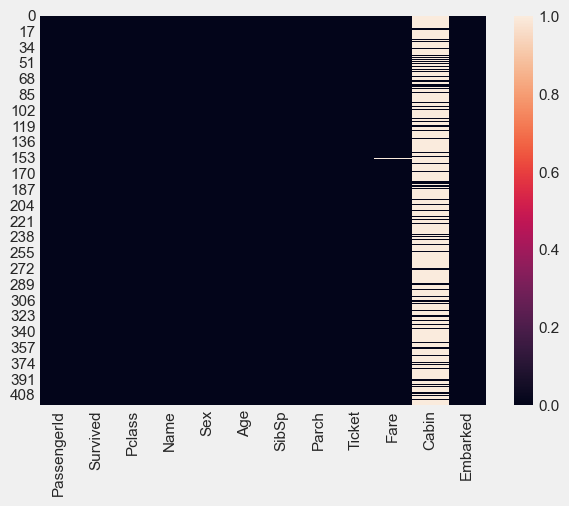

In [456]:
sns.heatmap(titanic_data.isna())

In [457]:
#find mode value of embarked
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [458]:
#repalcing missing value in embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [459]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0],inplace=True)

In [460]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

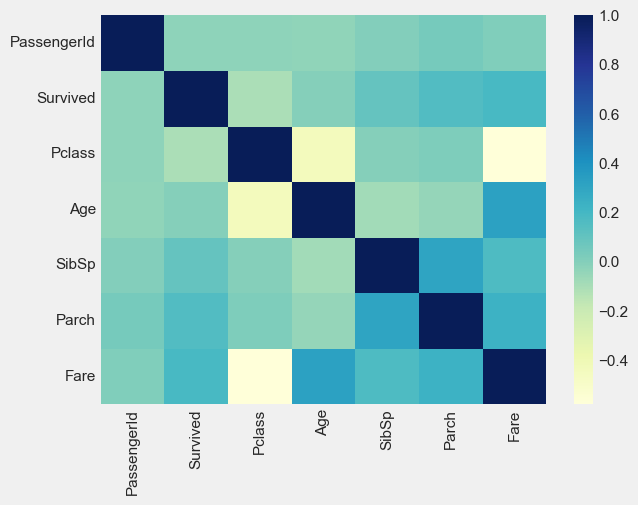

In [461]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

In [462]:
#sns.countplot(x='Sex',data=titanic_data)
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

,Sex,Survived
0,female,1.0
1,male,0.0


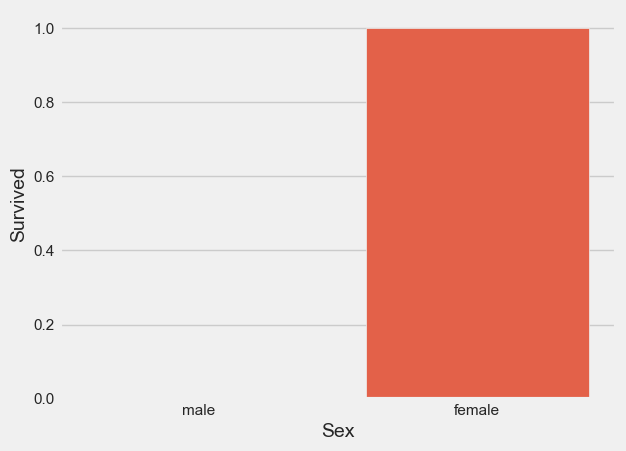

In [463]:
#survival percent comparing with sex
sns.barplot(x='Sex',y='Survived',data=titanic_data)
titanic_data.groupby('Sex',as_index=False).Survived.mean()

In [464]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

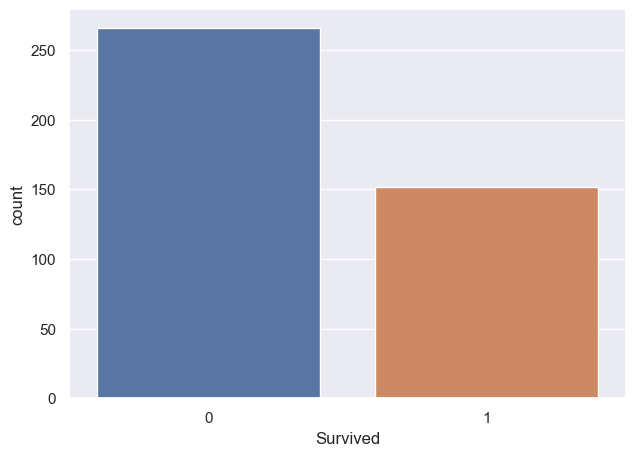

In [465]:
sns.countplot(x='Survived', data=titanic_data) 

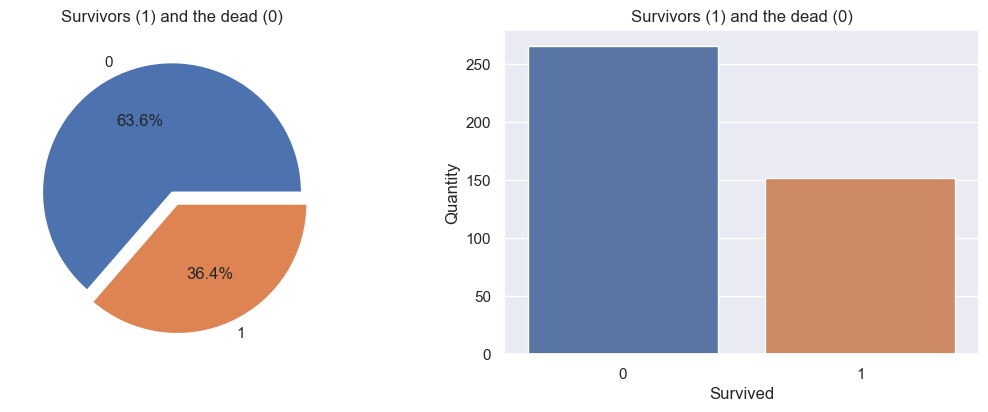

In [466]:

f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
titanic_data['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived', data=titanic_data, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show() 

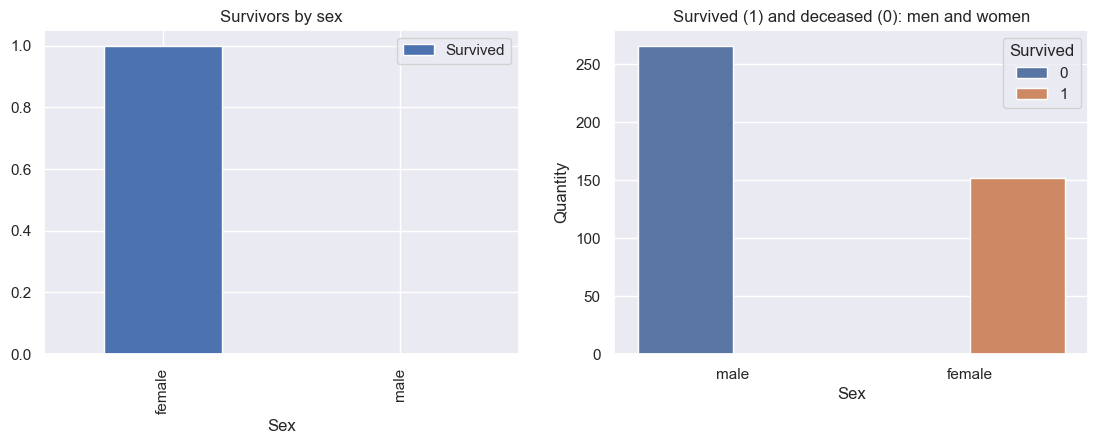

In [467]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
titanic_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 

In [468]:
titanic_data['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [469]:
#for null value
titanic_data['Age'].isna()


0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [470]:
titanic_data['Age'].isna().sum()/len(titanic_data['Age'])

0.0

<Axes: >

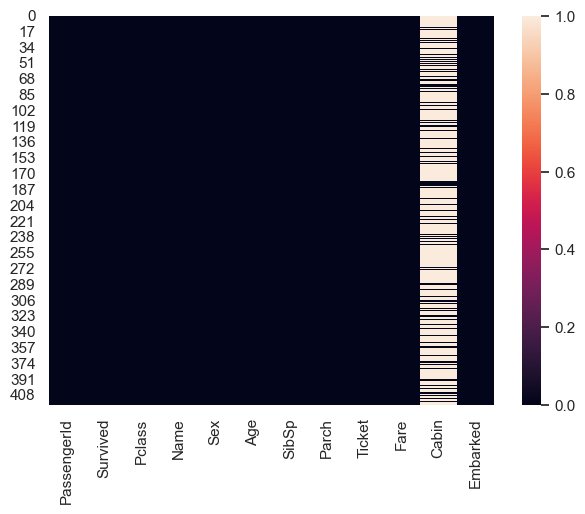

In [471]:
sns.heatmap(titanic_data.isna())

In [472]:
#handling misssing value 
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [473]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [474]:
#check for numeric and non numericvalue
# data types
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [475]:
#convert sex column to numerical 
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [476]:
#Use one of them and remai drop 
pd.get_dummies(titanic_data['Sex'],drop_first=True)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [477]:
titanic_data['Gender']=gender

In [478]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,1


In [479]:
#get only numerical alues
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [480]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.50000,0,0,7.8292,1
1,893,1,3,47.00000,1,0,7.0000,0
2,894,0,2,62.00000,0,0,9.6875,1
3,895,0,3,27.00000,0,0,8.6625,1
4,896,1,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,8.0500,1
414,1306,1,1,39.00000,0,0,108.9000,0
415,1307,0,3,38.50000,0,0,7.2500,1
416,1308,0,3,30.27259,0,0,8.0500,1


In [481]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [482]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.50000,0,0,7.8292,1
1,893,3,47.00000,1,0,7.0000,0
2,894,2,62.00000,0,0,9.6875,1
3,895,3,27.00000,0,0,8.6625,1
4,896,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1
414,1306,1,39.00000,0,0,108.9000,0
415,1307,3,38.50000,0,0,7.2500,1
416,1308,3,30.27259,0,0,8.0500,1


In [483]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [484]:
#build model using logestic regression
from sklearn.model_selection import train_test_split

In [485]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33,random_state=42)

In [486]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (280, 7) (138, 7)


In [487]:
from sklearn.linear_model import LogisticRegression

In [488]:
model=LogisticRegression()

In [489]:
model.fit(x_train,y_train)

LogisticRegression()

In [500]:
x_test_prediction=model.predict(x_test)

In [501]:
print(x_test_prediction)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0]


In [502]:
#testing
from sklearn.metrics import confusion_matrix

In [503]:
confusion_matrix(y_test,predict)

array([[92,  0],
       [ 0, 46]], dtype=int64)

In [504]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['predicted No','predicted Yes'],index=['Actual Yes','Actual No'])

,predicted No,predicted Yes
Actual Yes,92,0
Actual No,0,46


In [505]:
#classsification report
from sklearn.metrics import classification_report
from sklearn.svm import SVC  
from sklearn.datasets import load_iris  

In [506]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [509]:

test_data_accuracy = accuracy_score(y_test,x_test_prediction) 
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 1.0


In [510]:
x_train_prediction=model.predict(x_train)

In [511]:
print(x_train_prediction)

[0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0]


In [512]:
train_data_accuracy = accuracy_score(y_train,x_train_prediction) 
print('Accuracy score of train data:',train_data_accuracy)

Accuracy score of train data: 1.0
